In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from utils import PkdbModel, codeine_idx, measurement_type_data, filter_out, convert_unit, unstring
plt.style.use('seaborn-white')
import numpy as np
plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })

import pint
ureg = pint.UnitRegistry()


{'token': '55388d17d53f133a3f7eb7c69dd0874731fe3445'}


ImportError: cannot import name 'codeine_idx'

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
all_complete = PkdbModel("all_complete", destination="2-merged")
all_complete.read()

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2909: DtypeWarning: Columns (15,25,28,29,30,44,72,114,115,117,119,121,123,126,127,128,129,132,133,134,136,146,155,157,158,159,168,169,170,171,178,180,181,182,183,185,186,188,190,192,198,199,200,207,208,212,215,216,224,229,233,234,239,243) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
all_complete.data["CYP"] = all_complete.data[('cyp2d6 phenotype', 'choice')]
all_complete.data["CYP_G"] = all_complete.data[('cyp2d6 genotype', 'choice')]


In [5]:
index_timecourse= (all_complete.data["output_type"]== "timecourses") 
study_index = (all_complete.data["study"] == "Wu2014")
substance_index = (all_complete.data["substance"] == "morphine")
substance_intervention_index = (all_complete.data["substance_intervention"] == "codeine")
my_data = all_complete.data[index_timecourse & study_index & substance_index & substance_intervention_index]
my_data[["mean","time","sd","se","cv"]] =  my_data[["mean","time","sd","se","cv"]].applymap(eval).applymap(pd.to_numeric)
my_data["pharmacokinetics"] = my_data["pharmacokinetics"].apply(eval).apply(lambda x: [e.get("pk") for e in x])

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
colors = sns.color_palette("colorblind",n_colors=8)
#header_color = sns.color_palette("dark",n_colors=1)[0]
blues = sns.color_palette("Blues")
my_data["color"] = colors[:3]

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
frames = []
for i, df in my_data[["time","mean","sd","se","cv","CYP_G","unit","pk","color", "measurement_type"]].iterrows():

    #print(df["weight"])
    new_df = pd.concat([df]*len(df["time"]), axis=1).T.reset_index()
    new_df["time"] = df["time"]
    new_df["mean"] = df["mean"]
    new_df["sd"] = df["sd"]
    new_df["se"] = df["se"]
    new_df["cv"] = df["cv"]
    
    frames.append(new_df)
df_all = pd.concat(frames)
df_all = convert_unit(df_all, "gram / liter", unit_out = "ng/µl", factor=ureg("gram / liter").to("ng/µl").m , data_fields=["mean","sd","se"])

In [8]:
df_all

,index,time,mean,sd,se,cv,CYP_G,unit,pk,color,measurement_type
0,9677,0.00,0.0000,NaN,NaN,NaN,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
1,9677,0.25,0.2840,0.3330,0.11100,1.170,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
2,9677,0.50,0.5560,0.4840,0.16100,0.872,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
3,9677,1.00,0.5880,0.4100,0.13700,0.698,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
4,9677,2.00,0.4270,0.2780,0.09260,0.651,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
5,9677,3.00,0.2690,0.1450,0.04840,0.540,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
6,9677,4.00,0.1880,0.1100,0.03660,0.583,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
7,9677,6.00,0.1080,0.1200,0.03980,1.100,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
8,9677,8.00,0.0700,0.1160,0.03870,1.660,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration
9,9677,10.00,0.0608,0.0838,0.02790,1.380,*10/*10,ng/µl,2224,"(0.00392156862745098, 0.45098039215686275, 0.6...",concentration


In [9]:
from scipy import stats
def _regression(t, c):
    """ Linear regression on the log timecourse after maximal value.
    No check is performed if already in equilibrium distribution !.
    The linear regression is calculated from all data points after the maximum.

    :return:
    """
    # TODO: check for distribution and elimination part of curve.
    max_index = np.argmax(c)
    
    # linear regression
    x = t[-4:]
    y = np.log(c[-4:])
    if max_index == (len(c) - 1):
        return [np.nan] * 6
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return [slope, intercept, r_value, p_value, std_err, max_index]


In [10]:
#[slope, intercept, r_value, p_value, std_err, max_index] = _regression(x,y)

#plt.plot(x,y)
#plt.plot(x[3:],np.exp(intercept + slope * x[3:]), "--")
#plt.yscale("log")


In [11]:
#my_func()

In [12]:
#x = df_CYP["time"][3:]
#y = np.log(df_CYP["mean"][3:])
#[slope, intercept, r_value, p_value, std_err] = stats.linregress(x, y)
#[slope, intercept, r_value, p_value, std_err]

In [13]:
#plt.plot(x,y)
#plt.plot(x,intercept+slope*x)

In [14]:
#df_CYP["mean"][3]

In [15]:
# [np.exp(slope), np.exp(intercept), r_value, p_value, std_err, max_index]

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


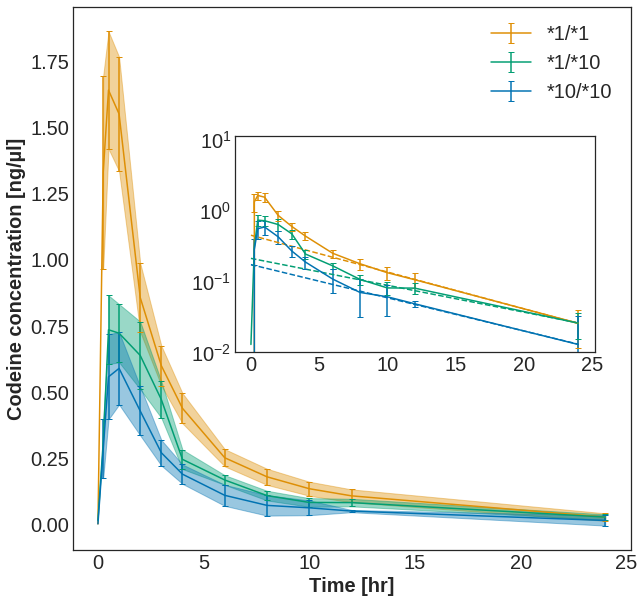

In [16]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

left, bottom, width, height = [0.35, 0.4, 0.5, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
axes = (ax1, ax2)
#ax2.xaxis.set_visible(False)
#ax2.yaxis.set_visible(False)                  
ax2.set_yscale("log")
ax2.set_ylim(bottom=0.01)                 

               
    
for CYP_G, df_CYP in df_all.groupby("CYP_G"):
    
    #label = CYP_G
    #for i, output in output_pks.iterrows():
    #    label += f"\n {output['pktype']:>10}: {output['mean']:<15} {'['+output['unit']+']':>10}"
    
    #print(label)
    if CYP_G == "*1/*1":
        x = df_CYP["time"]
        y = df_CYP["mean"]
    for ax in axes:
        ax.errorbar(df_CYP["time"], df_CYP["mean"],label=CYP_G,color=df_CYP['color'].unique()[0],yerr=df_CYP["se"], capsize=3)#, label=label)#,yerr=df_CYP["sd"])
        [slope, intercept, r_value, p_value, std_err, max_index] = _regression(df_CYP["time"],df_CYP["mean"])
       

    ax2.plot(df_CYP["time"],np.exp(intercept) * np.exp(slope * df_CYP["time"]), "--", color=df_CYP['color'].unique()[0])#, label="fit")

    
        
    ax1.fill_between(df_CYP["time"],df_CYP["mean"]-df_CYP["se"],df_CYP["mean"]+df_CYP["se"],alpha=0.4,edgecolor="gray",color = df_CYP['color'].unique()[0])
   
    
  

    
    
    
ax1.set_xlabel("Time [hr]")
ax1.set_ylabel(f"Codeine concentration [{df_CYP['unit'].unique()[0]}]")
           
frames  = []
               
index_raw = (all_complete.data["calculated"] == False)

for CYP_G, df_CYP in df_all.groupby("CYP_G"):    
    output_pks = all_complete.data[all_complete.data["timecourse_pk"] == df_CYP["pk"].unique()[0]]
    frames.append(output_pks)
               
                   
    study = output_pks["study"].unique()[0]
    index_study = (all_complete.data["study"] == study)
    intervention = output_pks["raw_pk_intervention"].unique()[0]
    index_intervention = (all_complete.data["raw_pk_intervention"] == intervention)
    substance = output_pks["substance"].unique()[0]
    index_substance = (all_complete.data["substance"] == substance)
    index_outputs= (all_complete.data["output_type"]== "outputs") 
    index_cyp = (all_complete.data["CYP_G"]== CYP_G)

            
    raw_outputs = all_complete.data[index_raw & index_study & index_intervention & index_substance & index_outputs & index_cyp]
    frames.append(raw_outputs)

           
outputs = pd.concat(frames)
               
outputs[["mean","sd","se","median"]]=outputs[["mean","sd","se","median"]].applymap(pd.to_numeric)

auc_unit = "ng/µl*hr"
clearance_unit = "l/hr"
cmax_unit = "ng/µl"
kel_unit = "1/hr"
hlf_unit = "hr"
vd_unit = "l"

convert_unit(df=outputs,unit_in ="gram * hour / liter", unit_out=auc_unit,factor=ureg("gram * hour / liter").to(auc_unit).m ,data_fields=["mean","sd","se","median"])
convert_unit(outputs,unit_in ="gram / liter",  unit_out=cmax_unit, factor=ureg("gram / liter").to(cmax_unit).m,data_fields=["mean","sd","se","median"])
               
               
convert_unit(outputs,unit_in ="hour",  unit_out=hlf_unit, factor=ureg("hour").to(hlf_unit).m ,data_fields=["mean","sd","se","median"])
convert_unit(outputs,unit_in ="liter / hour",  unit_out=kel_unit, factor=ureg("liter / hour").to(clearance_unit).m  ,data_fields=["mean","sd","se","median"])
convert_unit(outputs,unit_in ="liter",  unit_out=vd_unit, factor = ureg("liter").to(vd_unit).m ,data_fields=["mean","sd","se","median"])
               
               
convert_unit(outputs,unit_in ="1 / minute",  unit_out=hlf_unit, factor=ureg("1 / minute").to(kel_unit).m ,data_fields=["mean","sd","se","median"])
               


outputs_n = outputs.pivot_table(values="mean",index=["CYP_G"],columns=["measurement_type","calculated"])
#outputs_n =outputs_n[["auc_end","clearance","cmax","kel","thalf","vd"]].round(2)

outputs_n.rename(columns={"auc_end":f"AUC END [{auc_unit}]",
                          "clearance":f"CLEARANCE [{clearance_unit}]",
                          "cmax":f"CMAX [{cmax_unit}]",
                          "kel":f"KEL [{kel_unit}]",
                          "vd":f"VD [{vd_unit}]",
                          "thalf":f"THALF [{hlf_unit}]",



                         }, inplace=True)
outputs_n.sort_index(inplace = True)
           
"""

"""
ax1.legend()
plt.savefig("codeine.png")

plt.show()



In [17]:
diff_rel = "$\\frac{o - t}{o}$"
diff = "o-t"
original_pk = "$Pk_{original}$"
timecourse_pk = "$Pk_{timecourse}$"

In [18]:
outputs_n = outputs.reset_index().pivot_table(columns="calculated",index=["measurement_type","CYP_G","unit"],values = ["mean","sd"])


In [19]:
outputs_n[("mean", True)] = outputs_n[("mean", True)].round(2)

outputs_n[diff] = (outputs_n[("mean", False)] - outputs_n[("mean", True)]).round(2)
outputs_n[diff_rel] = (100*((outputs_n[("mean", False)] - outputs_n[("mean", True)]) / outputs_n[("mean", False)])).round(2)

mean_ind = ('mean', False)
sd_ind = ('sd', False)

def output_string(x):
    if x[mean_ind] > 0:
        return f"${x[mean_ind]:.2f} \pm {x[sd_ind]:.2f}$"
    else:
        return ""
    

outputs_n[original_pk] = outputs_n.apply(output_string, axis=1)
outputs_n[timecourse_pk] = outputs_n[('mean', True)]
                                          

In [20]:
#outputs_n.columns = outputs_n.columns.droplevel(1)


In [21]:
#outputs_n[[original_pk,timecourse_pk,diff,diff_rel]]
#outputs_n[[original_pk,timecourse_pk,diff,diff_rel]].to_csv("codeine.csv")

In [22]:
#outputs_n.replace(np.nan, '', regex=True)


In [23]:
outputs_n = outputs_n.reset_index()[["measurement_type","CYP_G","unit",original_pk,timecourse_pk,diff,diff_rel]]
outputs_n = outputs_n.rename(columns={"CYP_G":"${CYP}_{G}$","measurement_type":"Measurement Type","unit":"Unit"})
outputs_n = outputs_n.replace({"Measurement Type": {
    "auc_end": "$AUC_{end}$",
    "auc_inf": "$AUC_{\infty}$",
    "clearance": "$Clearance$",
    "cmax": "$C_{max}$",
    "kel": "$k_{el}$",
    "thalf": "$t_{half}$",
    "tmax": "$t_{max}$",
    "vd": "$Vd$",



}})
outputs_n = outputs_n.replace({"${CYP}_{G}$": {
    "*1/*1": "${^*}1/ {^*}1$",
    "*1/*10": "${^*}1/ {^*}10$",
    "*10/*10": "${^*}10/ {^*}10$",
}})

In [24]:
result = outputs_n[~(outputs_n.sort_index(na_position='last')["Measurement Type"] == "$k_{el}$")]
result =result.append(outputs_n[(outputs_n.sort_index(na_position='last')["Measurement Type"] == "$k_{el}$")]) 
#result.reset_index(["m"])

In [25]:
result = result.set_index(["Measurement Type","Unit","${CYP}_{G}$"])

In [37]:
result = result.replace(np.nan, '', regex=True)

In [38]:
result = result.droplevel(1,axis=1)
result.to_csv("codeine.csv")

In [39]:
result

$Pk_{original}$  \
Measurement Type Unit     ${CYP}_{G}$                           
$AUC_{end}$      ng/µl*hr ${^*}1/ {^*}1$      $6.63 \pm 2.07$   
                          ${^*}1/ {^*}10$     $3.77 \pm 1.93$   
                          ${^*}10/ {^*}10$    $2.65 \pm 1.95$   
$AUC_{\infty}$   ng/µl*hr ${^*}1/ {^*}1$      $8.52 \pm 4.10$   
                          ${^*}1/ {^*}10$     $5.05 \pm 3.30$   
                          ${^*}10/ {^*}10$    $3.26 \pm 2.43$   
$Clearance$      1/hr     ${^*}1/ {^*}1$      $5.08 \pm 3.39$   
                          ${^*}1/ {^*}10$     $9.72 \pm 8.72$   
                          ${^*}10/ {^*}10$  $16.20 \pm 12.30$   
$C_{max}$        ng/µl    ${^*}1/ {^*}1$      $2.06 \pm 0.89$   
                          ${^*}1/ {^*}10$     $0.96 \pm 0.42$   
                          ${^*}10/ {^*}10$    $0.68 \pm 0.50$   
$t_{half}$       hr       ${^*}1/ {^*}1$     $9.40 \pm 11.70$   
                          ${^*}1/ {^*}10$   $11.50 \pm 11.10$   
                          ${^*}10/ {^*}10$    $6.84 \pm 5.46$   
$t_{max}$        hr       ${^*}1/ {^*}1$      $0.64 \pm 0.28$   
                          ${^*}1/ {^*}10$     $0.86 \pm 0.52$   
                          ${^*}10/ {^*}10$    $0.86 \pm 0.52$   
$Vd$             l        ${^*}1/ {^*}1$                        
                          ${^*}1/ {^*}10$                       
                          ${^*}10/ {^*}10$                      
$k_{el}$         hr       ${^*}1/ {^*}1$                        
                          ${^*}1/ {^*}10$                       
                          ${^*}10/ {^*}10$                      

                                            $Pk_{timecourse}$   o-t  \
Measurement Type Unit     ${CYP}_{G}$                                 
$AUC_{end}$      ng/µl*hr ${^*}1/ {^*}1$                 6.24  0.39   
                          ${^*}1/ {^*}10$                3.80 -0.03   
                          ${^*}10/ {^*}10$               2.59  0.06   
$AUC_{\infty}$   ng/µl*hr ${^*}1/ {^*}1$                 6.40  2.12   
                          ${^*}1/ {^*}10$                3.97  1.08   
                          ${^*}10/ {^*}10$               2.68  0.58   
$Clearance$      1/hr     ${^*}1/ {^*}1$                 5.24 -0.16   
                          ${^*}1/ {^*}10$                8.02   1.7   
                          ${^*}10/ {^*}10$              13.10   3.1   
$C_{max}$        ng/µl    ${^*}1/ {^*}1$                 1.64  0.42   
                          ${^*}1/ {^*}10$                0.73  0.23   
                          ${^*}10/ {^*}10$               0.59  0.09   
$t_{half}$       hr       ${^*}1/ {^*}1$                 4.15  5.25   
                          ${^*}1/ {^*}10$                4.76  6.74   
                          ${^*}10/ {^*}10$               4.66  2.18   
$t_{max}$        hr       ${^*}1/ {^*}1$                 0.50  0.14   
                          ${^*}1/ {^*}10$                0.50  0.36   
                          ${^*}10/ {^*}10$               1.00 -0.14   
$Vd$             l        ${^*}1/ {^*}1$                31.30         
                          ${^*}1/ {^*}10$               55.00         
                          ${^*}10/ {^*}10$              88.10         
$k_{el}$         hr       ${^*}1/ {^*}1$                 0.17         
                          ${^*}1/ {^*}10$                0.15         
                          ${^*}10/ {^*}10$               0.15         

                                           $\frac{o - t}{o}$  
Measurement Type Unit     ${CYP}_{G}$                         
$AUC_{end}$      ng/µl*hr ${^*}1/ {^*}1$                5.88  
                          ${^*}1/ {^*}10$               -0.8  
                          ${^*}10/ {^*}10$              2.26  
$AUC_{\infty}$   ng/µl*hr ${^*}1/ {^*}1$               24.88  
                          ${^*}1/ {^*}10$              21.39  
                          ${^*}10/ {^*}10$             17.79  
$Cle